## TensorFlow Reinforcement Learning -- Battleship
##### JSL September 2016

In [1]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np
%matplotlib inline
import pylab
from BattleshipStats import Battleship
config = tf.ConfigProto(device_count = {'GPU': 0})

In [2]:
# 1.2 Define the nn variable network.
# Input is array of BOARD_SIZE values.
# ---------------------------------------
#  -1 value -> Not yet checked
#   0 value -> Checked, no ship
#   1 value -> Checked, is ship location.
# ---------------------------------------
BOARD_DIM = 5
BOARD_LEN = BOARD_DIM**2
SHIPS = [3]
MAX_SHIPS = np.max(SHIPS)
hidden_units = BOARD_DIM

input_positions = tf.placeholder(tf.float32, shape=(BOARD_DIM, BOARD_DIM))
labels =          tf.placeholder(tf.int64)
learning_rate =   tf.placeholder(tf.float32, shape=[])

# 1st
W1 = tf.Variable(tf.truncated_normal([BOARD_DIM, BOARD_DIM*MAX_SHIPS],
             stddev=0.1 / np.sqrt(float(BOARD_LEN))))
b1 = tf.Variable(tf.zeros([BOARD_DIM, BOARD_DIM*MAX_SHIPS]))
h1 = tf.tanh(tf.matmul(input_positions, W1) + b1)

# 2nd
W2 = tf.Variable(tf.truncated_normal([BOARD_DIM*MAX_SHIPS, BOARD_DIM*1],
             stddev=0.1 / np.sqrt(float(BOARD_LEN))))
b2 = tf.Variable(tf.zeros([BOARD_DIM*MAX_SHIPS, BOARD_DIM*MAX_SHIPS]))
h2 = tf.tanh(tf.matmul(W2, h1) + b2)

# 3rd
W3 = tf.Variable(tf.truncated_normal([BOARD_DIM*MAX_SHIPS, BOARD_DIM*MAX_SHIPS],
             stddev=0.1 / np.sqrt(float(BOARD_LEN))))
b3 = tf.Variable(tf.zeros([BOARD_DIM*MAX_SHIPS, BOARD_DIM*MAX_SHIPS]))
h3 = tf.nn.relu(tf.matmul(h2, W3) + b3)

# 4th
W4 = tf.Variable(tf.truncated_normal([BOARD_DIM*MAX_SHIPS, BOARD_DIM*MAX_SHIPS],
             stddev=0.1 / np.sqrt(float(BOARD_LEN))))
b4 = tf.Variable(tf.zeros([BOARD_DIM*MAX_SHIPS, BOARD_DIM*MAX_SHIPS]))
h4 = tf.nn.relu(tf.matmul(h3, W4) + b4)


# 5th
W5 = tf.Variable(tf.truncated_normal([BOARD_DIM, BOARD_DIM*MAX_SHIPS],
             stddev=0.1 / np.sqrt(float(BOARD_LEN))))
b5 = tf.Variable(tf.zeros([BOARD_DIM, BOARD_DIM*MAX_SHIPS]))
h5 = tf.tanh(tf.matmul(W5, h4) + b5)

# 6th
W6 = tf.Variable(tf.truncated_normal([BOARD_DIM*MAX_SHIPS, BOARD_DIM],
             stddev=0.1 / np.sqrt(float(hidden_units))))
b6 = tf.Variable(tf.zeros([BOARD_DIM, BOARD_DIM]))
logits = tf.reshape(tf.matmul(h5, W6) + b6, [1, -1])
#logits = tf.reshape(logits, [BOARD_DIM**2])

probabilities = tf.nn.softmax(logits) 

# 1.3 Define the operations we will use
init = tf.initialize_all_variables()
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=labels, name='xentropy')
train_step = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cross_entropy)
# Start TF session
sess = tf.Session(config=config)
sess.run(init)
#return sess

#sess = buildNetwork(hidden_units, output_units)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [5]:
# 1.4 Game play definition.
TRAINING = True
def play_game(training=TRAINING):
    """ Play game of battleship using network."""
    # Select random location for ship
    battleship = Battleship(dim=BOARD_DIM, ships=SHIPS)
    ship_positions = battleship.randomBoardFlatIndeces()
    # Initialize logs for game
    board_position_log = []
    action_log = []
    hit_log = []
    # Play through game
    current_board = [[-1 for i in range(BOARD_LEN)]]
    while (sum(hit_log) < np.sum(SHIPS)) and (len(action_log) < BOARD_LEN):
        board_position_log.append([[i for i in current_board[0]]])
        probs = sess.run([probabilities], feed_dict={input_positions:np.array(current_board).reshape((BOARD_DIM, BOARD_DIM))})[0][0]
        #print(probs)
        probs = [p * (index not in action_log) for index, p in enumerate(probs)]
        probs = [p / sum(probs) for p in probs]
        if training == True:
            bomb_index = np.random.choice(BOARD_LEN, p=probs)            
        else:
            bomb_index = np.argmax(probs)
        # update board, logs
        hit_log.append(1 * (bomb_index in ship_positions))
        current_board[0][bomb_index] = 1 * (bomb_index in ship_positions)
        action_log.append(bomb_index)
    return board_position_log, action_log, hit_log
# Example:
play_game()

([[[-1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1]],
  [[-1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    0,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1]],
  [[-1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    0,
    -1,
    -1,
    -1,
    -1,
    0,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1]],
  [[-1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    0,
    -1,
    -1,
    -1,
    0,
    0,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1]],
  [[-1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    0,
    -1,
    0,
    -1,
    -1,
    -1,
    0,
    0,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1]],


In [6]:
# 1.5 Reward function definition
def rewards_calculator(hit_log, gamma=0.45):
    """ Discounted sum of future hits over trajectory"""            
    hit_log_weighted = [(item -  
                         float(np.sum(SHIPS) - sum(hit_log[:index])) / float(BOARD_LEN - index)) * (
            gamma ** index) for index, item in enumerate(hit_log)]
    un_adj =  [((gamma) ** (-i)) * sum(hit_log_weighted[i:]) for i in range(len(hit_log))]
    return [i if i > 0 else i for i in un_adj]

# Example
rewards_calculator([0,0,1,1,1], gamma=.45)

[0.12173143704121969,
 0.5371809712027105,
 1.4715132693393562,
 1.3376623376623378,
 0.9523809523809524]

In [7]:
from tqdm import tqdm 
# 1.6 Training loop: Play and learn
game_lengths = []
rewards = []
TRAINING = True   # Boolean specifies training mode
ALPHA = 0.0001    # step size

for game in tqdm(range(50000)):
    if game % 1000 == 999:
        window_size = 300
        running_average_length = [np.mean(game_lengths[i:i+window_size]) for i in range(len(game_lengths)- window_size)]
        pylab.plot(running_average_length)
        pylab.show()
    board_position_log, action_log, hit_log = play_game(training=TRAINING)
    game_lengths.append(len(action_log))
    rewards_log = rewards_calculator(hit_log)
    rewards += [2*(np.array(hit_log))-1]
    for reward, current_board, action in zip(rewards_log, board_position_log, action_log):
        # Take step along gradient
        if TRAINING:
            sess.run([train_step], 
                feed_dict={input_positions:np.array(current_board).reshape((BOARD_DIM, BOARD_DIM)), labels:[action], learning_rate:ALPHA * reward })

  0%|▏                                                                             | 137/50000 [00:02<15:58, 52.02it/s]


KeyboardInterrupt: 

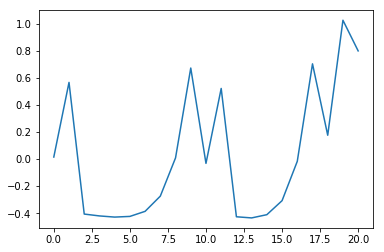

In [191]:
# 1.7 Plot running average game lengths
pylab.plot(rewards[-1])

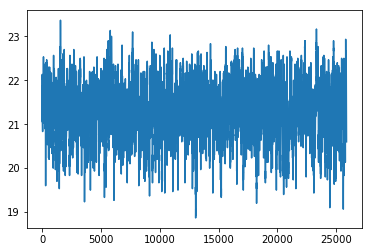

In [83]:
window_size = 30
running_average_length = [np.mean(game_lengths[i:i+window_size]) for i in range(len(game_lengths)- window_size)]
pylab.plot(running_average_length)

In [26]:
# 1.8 Example showing how to print current coefficient values
sess.run([W1], 
             feed_dict={input_positions:board_position_log[0]})

[array([[ 0.36417413,  0.21842285, -1.05438769,  0.92670012, -0.971443  ,
         -0.42181543, -0.12549876, -0.1459792 ,  1.37149823,  0.88486165],
        [ 0.40269327, -2.3138361 , -1.52807772, -1.89444983,  1.6621691 ,
          1.21897411, -0.59128791,  0.32018194,  0.12851822, -1.5733639 ],
        [ 0.75337362,  1.18250155,  1.49976432,  2.45021749, -2.0455699 ,
         -1.00975513, -3.52385998, -2.81726122, -1.13073385,  0.09371365],
        [-2.73572493, -2.58016634, -2.54336786,  0.78801006, -1.01746631,
          0.83182812, -0.28737754,  0.25912744, -0.71347362,  5.37003899],
        [-0.85589498,  1.38819838,  3.10451198, -3.52761793, -2.22771525,
         -0.35671455,  2.07410955, -1.88416684, -1.69944739, -0.94166577],
        [ 1.26362193, -1.74665356, -0.12891544,  0.56791085,  2.06429219,
         -1.82320964, -1.02321613,  2.33585477,  0.26630208, -0.07931795],
        [-0.70836729,  1.72130585, -2.96304846, -0.78141487, -3.5275557 ,
          1.48491037,  0.2049609

In [86]:
set(range(1,3+5))

{1, 2, 3, 4, 5, 6, 7}

[36,
 83,
 46,
 65,
 87,
 53,
 41,
 66,
 71,
 45,
 48,
 42,
 44,
 74,
 64,
 67,
 85,
 15,
 22,
 55,
 59,
 56,
 32,
 35,
 81,
 76,
 13,
 62,
 25,
 78,
 72,
 50,
 7,
 33,
 11,
 34,
 57,
 70,
 61,
 49,
 28,
 52,
 47,
 54,
 23,
 31,
 24,
 88,
 63,
 18,
 86,
 5,
 21,
 77,
 68,
 26,
 60,
 43,
 96,
 20,
 95,
 39,
 14,
 75,
 58,
 3,
 8,
 94,
 82,
 27,
 30,
 51,
 38,
 69,
 84,
 40,
 80,
 73,
 16,
 37,
 4,
 79,
 93,
 97,
 2,
 12,
 98,
 19,
 29,
 1,
 6,
 17,
 92]